# Week 2 - Environmental Monitoring and Pollution Control
This notebook demonstrates the Week 2 milestone tasks:
- Selecting a machine learning model (Linear Regression)
- Training and testing the model on pollutant dataset
- Evaluating model performance with metrics
- Visualizing predictions vs actual values

Dataset: air_quality_sample.csv (created in Week 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style='whitegrid')

## Load Dataset

In [2]:
# Try loading dataset
try:
    df = pd.read_csv('air_quality_sample.csv')
except FileNotFoundError:
    from google.colab import files
    print('Upload air_quality_sample.csv file')
    uploaded = files.upload()
    fname = list(uploaded.keys())[0]
    df = pd.read_csv(fname)

df.head()

Upload air_quality_sample.csv file


Saving air_quality_sample.csv to air_quality_sample.csv


,Date,CO,NO2,Ozone,PM2.5,PM10,Temperature,Humidity
0,2024-01-01,1.00,54.9,30.3,37.8,150.2,15.6,73.1
1,2024-01-02,2.38,15.9,110.3,52.6,55.9,26.3,21.7
2,2024-01-03,1.86,21.3,70.5,38.9,128.0,36.2,21.5
3,2024-01-04,1.54,72.9,102.6,27.0,133.1,32.0,42.7
4,2024-01-05,0.47,52.5,52.0,31.3,102.1,34.2,54.2


## Feature Selection

In [3]:
features = ['CO', 'NO2', 'PM2.5', 'PM10', 'Temperature', 'Humidity']
target = 'Ozone'

X = df[features]
y = df[target]

print('Features:', features)
print('Target:', target)
print('X shape:', X.shape)
print('y shape:', y.shape)

Features: ['CO', 'NO2', 'PM2.5', 'PM10', 'Temperature', 'Humidity']
Target: Ozone
X shape: (200, 6)
y shape: (200,)


## Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (160, 6) (160,)
Testing set: (40, 6) (40,)


## Train Model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficients:')
for f, c in zip(features, model.coef_):
    print(f, ':', c)

Intercept: 85.62697944480146
Coefficients:
CO : -4.208805787794848
NO2 : -0.15926756119665025
PM2.5 : -0.029958614031306993
PM10 : -0.01405001358736048
Temperature : 0.32582270180122463
Humidity : -0.09801369230360299


## Predictions

In [6]:
y_pred = model.predict(X_test)
print('First 10 Predictions:', y_pred[:10])

First 10 Predictions: [70.59996354 82.1203727  59.84138674 73.78314104 76.07657667 63.9357479
 68.17466242 73.38090771 77.91749255 64.13927302]


## Model Evaluation

In [7]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R² Score:', r2)

Mean Squared Error: 996.2423166564516
Mean Absolute Error: 26.44628176507955
R² Score: -0.02487402368684899


## Visualization

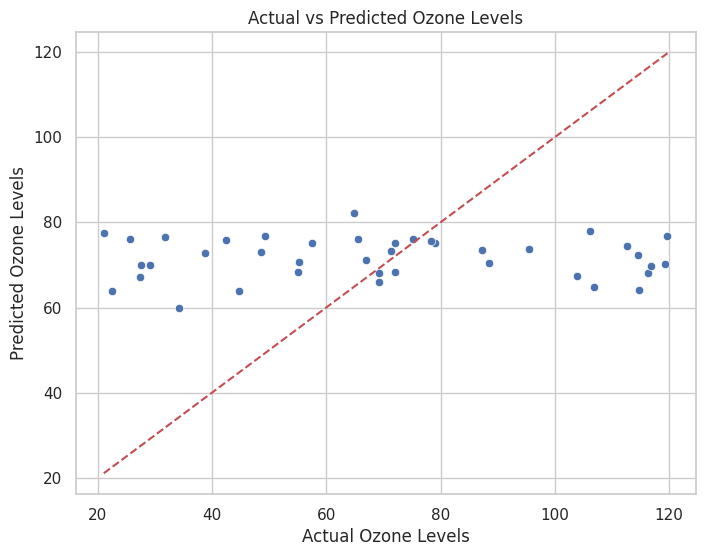

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ozone Levels')
plt.ylabel('Predicted Ozone Levels')
plt.title('Actual vs Predicted Ozone Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Conclusion
- Linear Regression model implemented.
- Model trained to predict Ozone levels using pollutant and weather features.
- Evaluation performed with MSE, MAE, and R² metrics.
- Results visualized with Actual vs Predicted scatter plot.

This completes Week 2 milestone: model selection, implementation, and evaluation.